In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("Copy of Copy of IVTU HOUSING DATA (updated) - 2019-2023 Price Adjust for 2024.csv")

In [62]:
df.head()

,YEAR,STREET #,STREET NAME,BEDROOM,BATHROOM,MONTHLY RENT ($) NORMALIZE,SECURITY ($) NORMALIZED,FURNISHED (Y/N),WATER (Y/N),TRASH (Y/N),UTILITIES INCL,LEASOR,UNIT #,PROPERTY TYPE,Unnamed: 14,Unnamed: 15,CPI
0,2019,6566,DEL PLAYA,0,1.0,"1,809.55","1,809.55",N,N,Y,T,SFM VISTA DEL MAR,C,0,NaN,2019.0,255.6575
1,2019,6566,DEL PLAYA,3,2.0,"5,247.70","5,247.70",N,N,Y,T,SFM VISTA DEL MAR,A,APT,NaN,2020.0,258.8120
2,2019,6566,DEL PLAYA,3,2.0,"5,428.66","5,428.66",N,N,Y,T,SFM VISTA DEL MAR,B,APT,NaN,2021.0,270.9700
3,2019,6712,DEL PLAYA,2,1.0,"3,619.10","3,619.10",N,N,Y,T,SFM VISTA DEL MAR,A,APT,NaN,2022.0,292.6560
4,2019,6712,DEL PLAYA,2,1.0,"3,739.74","3,739.74",N,N,Y,T,SFM VISTA DEL MAR,B,APT,NaN,2023.0,304.7020


In [63]:
df = df.drop(columns = ['YEAR', 'Unnamed: 14', 'Unnamed: 15', 'CPI'], axis = 1)
df['MONTHLY RENT ($) NORMALIZE'] = pd.to_numeric(df['MONTHLY RENT ($) NORMALIZE'].str.replace(',',''), downcast = "float")
df['SECURITY ($) NORMALIZED'] = pd.to_numeric(df['SECURITY ($) NORMALIZED'].str.replace(',',''), downcast = "float")
df.head()

,STREET #,STREET NAME,BEDROOM,BATHROOM,MONTHLY RENT ($) NORMALIZE,SECURITY ($) NORMALIZED,FURNISHED (Y/N),WATER (Y/N),TRASH (Y/N),UTILITIES INCL,LEASOR,UNIT #,PROPERTY TYPE
0,6566,DEL PLAYA,0,1.0,1809.55,1809.55,N,N,Y,T,SFM VISTA DEL MAR,C,0
1,6566,DEL PLAYA,3,2.0,5247.70,5247.70,N,N,Y,T,SFM VISTA DEL MAR,A,APT
2,6566,DEL PLAYA,3,2.0,5428.66,5428.66,N,N,Y,T,SFM VISTA DEL MAR,B,APT
3,6712,DEL PLAYA,2,1.0,3619.10,3619.10,N,N,Y,T,SFM VISTA DEL MAR,A,APT
4,6712,DEL PLAYA,2,1.0,3739.74,3739.74,N,N,Y,T,SFM VISTA DEL MAR,B,APT


In [64]:
cluster1 = df[['BEDROOM', 'BATHROOM', 'MONTHLY RENT ($) NORMALIZE']]
cluster1

,BEDROOM,BATHROOM,MONTHLY RENT ($) NORMALIZE
0,0,1.0,1809.55
1,3,2.0,5247.70
2,3,2.0,5428.66
3,2,1.0,3619.10
4,2,1.0,3739.74
...,...,...,...
192,4,2.0,7220.98
193,2,2.0,2672.19
194,2,1.0,2631.70
195,2,2.0,3239.02


In [65]:
cluster1 = cluster1.groupby(['BEDROOM', 'BATHROOM'])
cluster1.head(10)

,BEDROOM,BATHROOM,MONTHLY RENT ($) NORMALIZE
0,0,1.0,1809.55
1,3,2.0,5247.70
2,3,2.0,5428.66
3,2,1.0,3619.10
4,2,1.0,3739.74
...,...,...,...
175,5,2.0,13158.50
176,5,2.0,12146.31
178,2,1.5,6326.20
179,7,3.0,16954.22


In [66]:
cluster1 = cluster1.mean(numeric_only = True)
cluster1.head(20)

MONTHLY RENT ($) NORMALIZE
BEDROOM BATHROOM                            
0       1.0                      1440.708462
1       1.0                      1841.778333
2       1.0                      3050.352069
        1.5                      5223.698571
        2.0                      3671.161667
3       1.0                      3597.045000
        2.0                      5697.838387
4       2.0                      8314.223125
        3.0                     13411.545000
5       2.0                     10647.476667
        3.0                     10121.920000
6       2.5                     17207.270000
        4.0                     17586.840000
7       3.0                     16954.220000

In [75]:
cluster1['BEDBATH'] = cluster1.index()

TypeError: 'MultiIndex' object is not callable

In [77]:
clustermat1 = cluster1.unstack(level = "BATHROOM")
clustermat1

MONTHLY RENT ($) NORMALIZE                                       \
BATHROOM                        1.0          1.5           2.0       2.5   
BEDROOM                                                                    
0                       1440.708462          NaN           NaN       NaN   
1                       1841.778333          NaN           NaN       NaN   
2                       3050.352069  5223.698571   3671.161667       NaN   
3                       3597.045000          NaN   5697.838387       NaN   
4                               NaN          NaN   8314.223125       NaN   
5                               NaN          NaN  10647.476667       NaN   
6                               NaN          NaN           NaN  17207.27   
7                               NaN          NaN           NaN       NaN   

                               
BATHROOM        3.0       4.0  
BEDROOM                        
0               NaN       NaN  
1               NaN       NaN  
2               NaN       NaN  
3               NaN       NaN  
4         13411.545       NaN  
5         10121.920       NaN  
6               NaN  17586.84  
7         16954.220       NaN

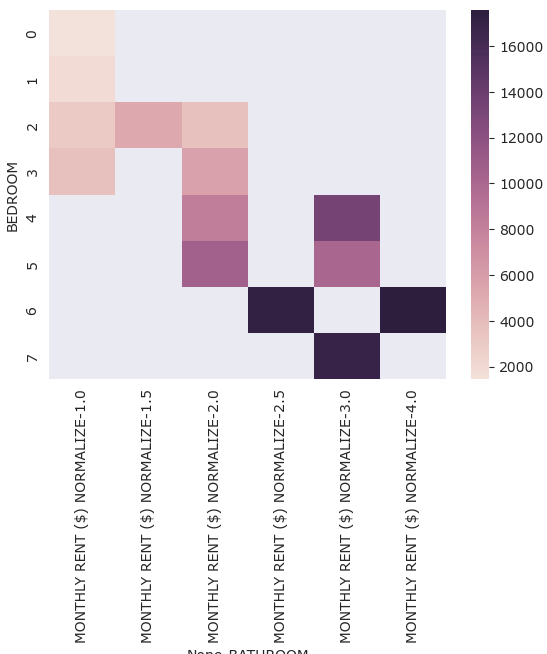

In [87]:
cmap = sns.cubehelix_palette(as_cmap = True, light = .9)
cmap.set_under(".5")
with sns.axes_style('dark'):
    sns.heatmap(clustermat1, cmap = cmap, mask = clustermat1.isnull())